<a href="https://colab.research.google.com/github/quddaz/Machine_Learing/blob/main/6%EC%9E%A5/6-2%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

+ 앞에서는 사과, 파인애플, 바나나에 있는 각 픽셀의 평균 값을 구해서 가장 가까운 사진을 고른다.
+ 사진이 무엇인지 알고 있기 때문에 가능
+ 비지도 학습은 사진이 어떤 과일인지도 몰라야 된다.

## k-평균 알고리즘

+ k-평균 군집 알고리즘이 평균값을 자동으로 찾아준다.
+ 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심 또는 센트로이드라고 부른다.

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2024-04-30 07:30:00--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-04-30 07:30:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-04-30 07:30:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [5]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [6]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


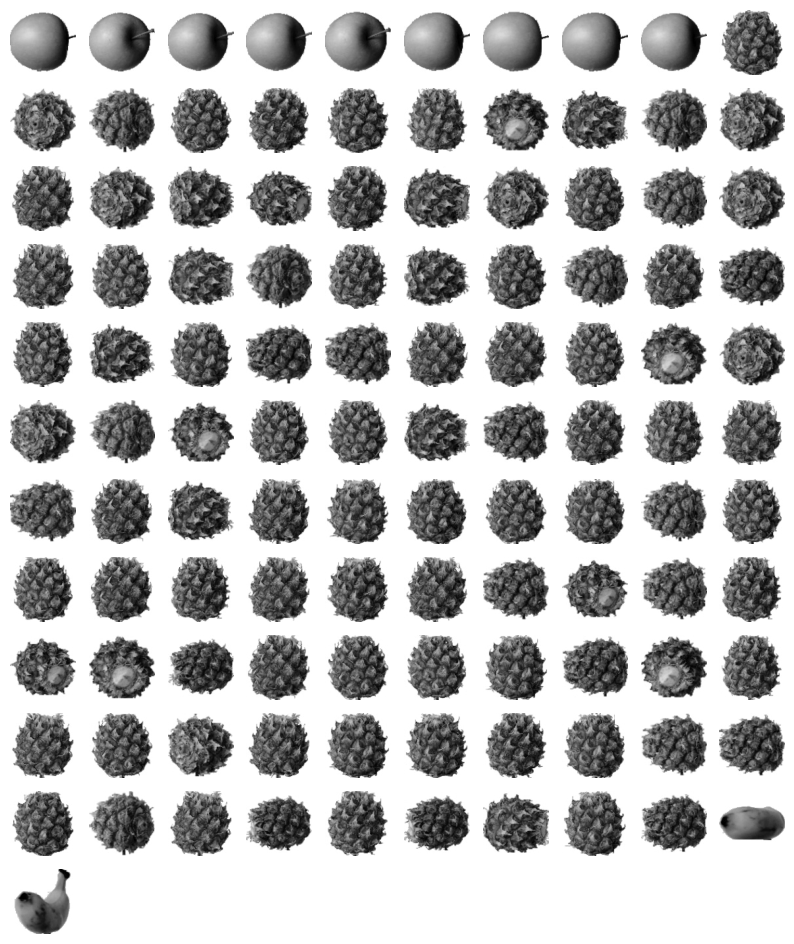

In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


draw_fruits(fruits[km.labels_==0])

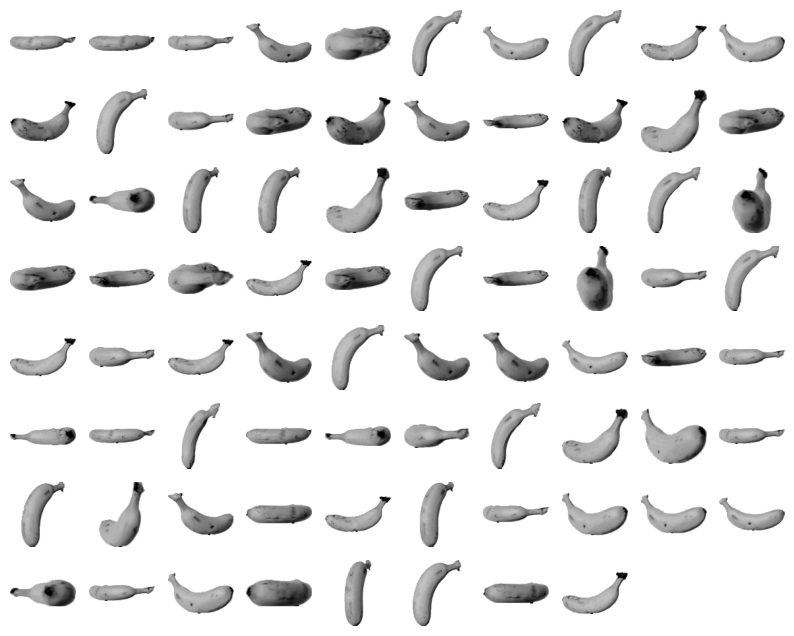

In [11]:
draw_fruits(fruits[km.labels_==1])

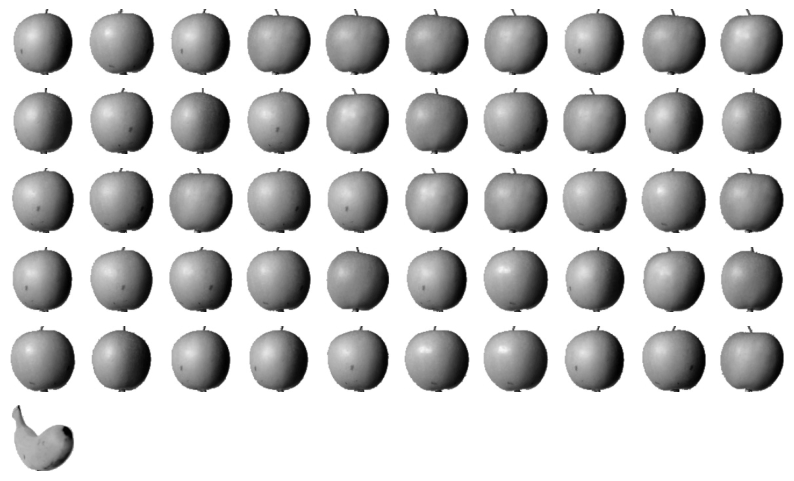

In [12]:
draw_fruits(fruits[km.labels_==2])

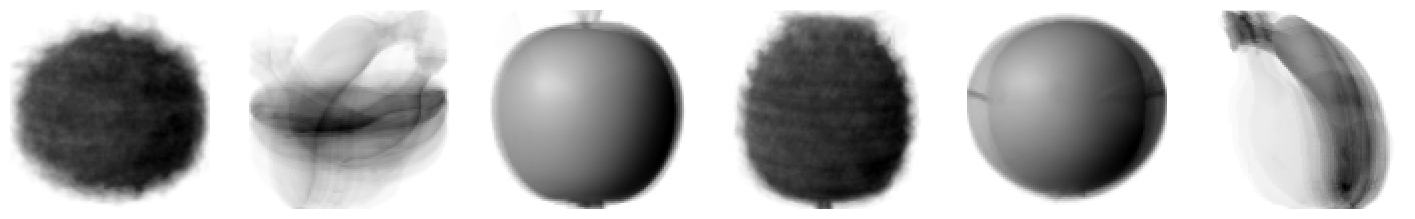

In [13]:

draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [14]:

print(km.transform(fruits_2d[100:101]))

[[4485.41329574 9102.6689106  5217.39945706 2911.55751007 5585.89774604
  8913.31689135]]


In [15]:
print(km.predict(fruits_2d[100:101]))

[3]


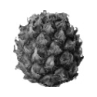

In [18]:
draw_fruits(fruits[100:101])

In [17]:

print(km.n_iter_)

3


# 최적의 K 찾기

+ K-평균 알고리즘의 단점은 미리 클러스터의 개수를 지정해야한다.
+ 실전에는 몇 개의 클러스터가 있는지 모르기 때문에 적합한 군집 K개를 완벽하게 찾는 방법은 없다.
+ 도구를 이용하여 찾을 수 있지만 각각 장단점을 가지고 있고 완벽하지 않다.
+ 대표적인 도구는 엘보우가 있다.



> 엘보우 방법

+ 이너셔 : 클러스터 중심과 클러스에 속한 샘플 사이의 거리의 제곱합
+ 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 잇는지를 나타내는 값이다.
+ 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기가 줄어들어 이너셔도 줄어든다.
+ 클러스터의 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법



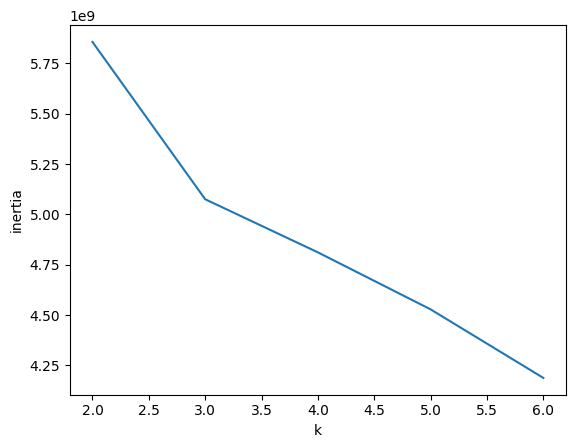

In [10]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()